In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [282]:
from sklearn.multiclass import OneVsRestClassifier

In [284]:
Readings = pd.read_csv('Wall Robot Navigation.csv')

In [285]:
feature,target = Readings.drop(columns = 'Class'),Readings.Class

In [286]:
z = label_binarize(target,classes = [1,2,3,4])

In [377]:
z.shape

(5456, 4)

In [288]:
trainX,testX,trainY,testY = train_test_split(feature,z)

# Decison Tree

In [289]:
dt = OneVsRestClassifier(DecisionTreeClassifier())
dt.fit(trainX,trainY)
dt.score(testX,testY)

0.9824046920821115

In [290]:
n_classes = z.shape[1]

In [314]:
y_score = dt.predict_proba(testX)

In [297]:
y_score[:,0]

array([1., 0., 0., ..., 0., 0., 0.])

In [294]:

fpr = dict()
tpr = dict()
roc_auc = dict()

In [298]:
for i in range(1,n_classes+1):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i-1], y_score[:, i-1])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [329]:
colors = cycle(['aqua','darkorange','cornflowerblue','magenta'])

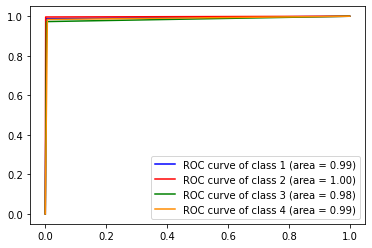

In [304]:
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend();
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Logistic

In [306]:
lr = OneVsRestClassifier(LogisticRegression())
lr.fit(trainX,trainY)
lr.score(testX,testY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5689149560117303

In [315]:
y_score = lr.predict_proba(testX)

In [316]:
y_score[:,0]

array([0.60962731, 0.13546721, 0.07807061, ..., 0.03481856, 0.72862956,
       0.43331977])

In [324]:

fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

In [ ]:
for i in range(1,n_classes+1):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i-1], y_score[:, i-1])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [325]:
for i in range(1,n_classes+1):
    fpr_lr[i],tpr_lr[i],_lr = roc_curve(testY[:,i-1],y_score[:,i-1])
    roc_auc_lr[i] =  auc(fpr_lr[i],tpr_lr[i])

In [326]:
roc_auc_lr

{1: 0.8354675962730593,
 2: 0.8676938342757721,
 3: 0.9619421747328724,
 4: 0.9207894917818582}

In [ ]:
for i, color in zip(range(1,n_classes+1), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend();

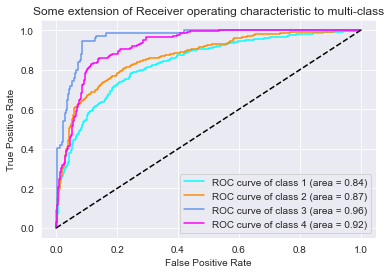

In [331]:
sns.set_style('darkgrid')
for i, color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_lr[i],tpr_lr[i],color = color,
            label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i,roc_auc_lr[i]))
plt.legend();
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# KNN

In [332]:
knn = OneVsRestClassifier(KNeighborsClassifier())
y_score_knn = knn.fit(trainX,trainY).predict_proba(testX)

In [339]:
knn.score(testX,testY)

0.8526392961876833

In [333]:
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

In [334]:
for i in range(1,n_classes+1):
    fpr_knn[i],tpr_knn[i],_ = roc_curve(testY[:,i-1],y_score_knn[:,i-1])
    roc_auc_knn[i] = auc(fpr_knn[i],tpr_knn[i])

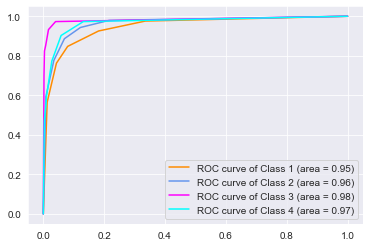

In [338]:
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_knn[i],tpr_knn[i],color = color,
            label = 'ROC curve of Class {0} (area = {1:0.2f})'.format(i,roc_auc_knn[i]))
plt.legend();

## Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [354]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

In [343]:
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(trainX,trainY)
np.round(rf.score(testX,testY),2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.98

In [344]:
y_score_rf = rf.predict_proba(testX)

In [351]:
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

In [346]:
help(OneVsRestClassifier)

Help on class OneVsRestClassifier in module sklearn.multiclass:

class OneVsRestClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.MultiOutputMixin)
 |  OneVsRestClassifier(estimator, n_jobs=None)
 |  
 |  One-vs-the-rest (OvR) multiclass/multilabel strategy
 |  
 |  Also known as one-vs-all, this strategy consists in fitting one classifier
 |  per class. For each classifier, the class is fitted against all the other
 |  classes. In addition to its computational efficiency (only `n_classes`
 |  classifiers are needed), one advantage of this approach is its
 |  interpretability. Since each class is represented by one and one classifier
 |  only, it is possible to gain knowledge about the class by inspecting its
 |  corresponding classifier. This is the most commonly used strategy for
 |  multiclass classification and is a fair default choice.
 |  
 |  This strategy can also be used for multilabel learning, where a classifie

In [352]:
for i in range(1,n_classes+1):
    fpr_rf[i],tpr_rf[i],_ = roc_curve(testY[:,i-1],y_score_rf[:,i-1])
    roc_auc_rf[i] = auc(fpr_rf[i],tpr_rf[i])

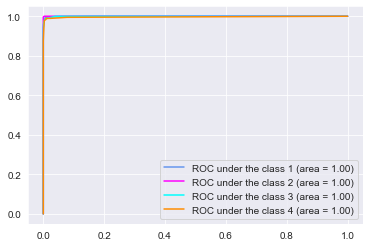

In [353]:
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_rf[i],tpr_rf[i],color = color,
            label = 'ROC under the class {0} (area = {1:0.2f})'.format(i,roc_auc_rf[i]))
plt.legend();

In [366]:
pipeline = make_pipeline(RandomOverSampler(), OneVsRestClassifier(DecisionTreeClassifier()))

In [367]:
pipeline.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features=None,
                                                                      max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_impurity_split=None,
                                                                      min_sampl

In [368]:
pipeline.score(testX,testY)

0.9787390029325513

In [369]:
y_score_pl = pipeline.predict_proba(testX)

In [370]:
fpr_pl = dict()
tpr_pl = dict()
roc_auc_pl = dict()

In [371]:
for i in range(1,n_classes+1):
    fpr_pl[i],tpr_pl[i],_ = roc_curve(testY[:,i-1],y_score_pl[:,i-1])
    roc_auc_pl[i] = auc(fpr_pl[i],tpr_pl[i])

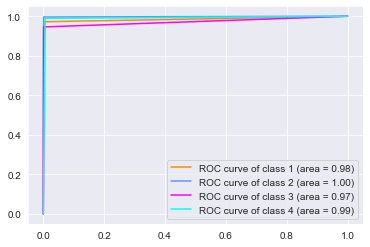

In [376]:
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_pl[i],tpr_pl[i],color = color,
            label = 'ROC curve of class {0} (area = {1:.2f})'.format(i,roc_auc_pl[i]))
    
plt.legend();

In [449]:
trainx,testx,trainy,testy = train_test_split(feature,target)

In [450]:
dt = KNeighborsClassifier()
dt.fit(trainx,trainy)
dt.score(testx,testy)

0.8489736070381232

In [451]:
testing = label_binarize(testy,classes = [1,2,3,4])

In [452]:
testing

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [453]:
testing.shape

(1364, 4)

In [454]:
y_score = dt.predict_proba(testx)

In [455]:
y_score.shape

(1364, 4)

In [456]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [457]:
for i in range(1,n_classes+1):
    fpr[i],tpr[i],_ = roc_curve(testing[:,i-1],y_score[:,i-1])
    roc_auc[i] = auc(fpr[i],tpr[i])

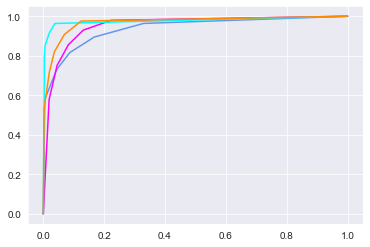

In [458]:
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr[i],tpr[i],color = color)